In [1]:
import pandas  as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import plotly
import plotly.express as px
import plotly.graph_objects as go
plt.rcParams["figure.figsize"]=(10,5)
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import folium

In [2]:
pyo.init_notebook_mode(connected=True)

In [3]:
df=pd.read_excel("C:/Users/lavak/Downloads/Covid cases in India.xlsx")

In [4]:
df.drop("S. No.",axis=1,inplace=True)

In [5]:
# we want know the total no.of cases by state wise and overall total
df.columns

Index(['Name of State / UT', 'Total Confirmed cases (Indian National)',
       'Total Confirmed cases ( Foreign National )', 'Cured', 'Death'],
      dtype='object')

In [6]:
df["total_cases"]=df["Total Confirmed cases (Indian National)"]+df["Total Confirmed cases ( Foreign National )"]

In [7]:
t_cases=sum(df["total_cases"])
print(f"the total no.of cases in india--->{t_cases}")

the total no.of cases in india--->729


In [8]:
#we want to make another columns know the total active cases
df["active_cases"]=df["total_cases"]-df["Cured"]-df["Death"]

In [9]:
df.head()

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,total_cases,active_cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19


In [10]:
df.style.background_gradient(cmap="Reds")

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,total_cases,active_cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,3
6,Karnataka,20,0,3,2,20,15
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,22
9,Maharashtra,144,3,15,4,147,128


In [11]:
df.groupby("Name of State / UT")["active_cases"].sum().sort_values(ascending=False).to_frame().style.background_gradient()
#df.groupby("Name of State / UT")["Cured"].sum().sort_values(ascending=False).to_frame().style.background_gradient()

,active_cases
Name of State / UT,
Maharashtra,128
Kerala,127
Telengana,44
Rajasthan,40
Gujarat,40
Tamil Nadu,33
Uttar Pradesh,32
Delhi,32
Punjab,28


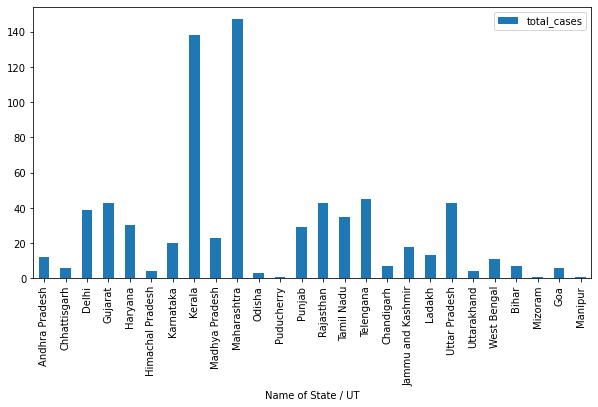

In [14]:
df.plot(kind="bar",x="Name of State / UT",y="total_cases")
plt.show()
#df.iplot(kind="bar",x="Name of State / UT",y="total_cases")

# matplotlib vs plotly vs plotly express

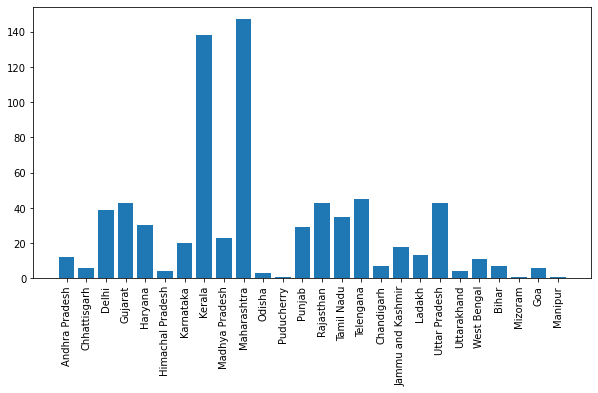

In [15]:
# matplotlibl visulizeation
plt.bar(df["Name of State / UT"],df["total_cases"],)
plt.xticks(rotation=90)
plt.show()

In [16]:
px.bar(df,x="Name of State / UT",y="total_cases")

<AxesSubplot:xlabel='Name of State / UT', ylabel='total_cases'>

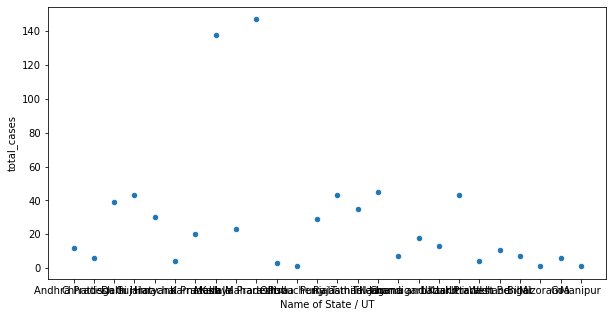

In [17]:
#scatter plot in pandas
df.plot(kind="scatter",x="Name of State / UT",y="total_cases")

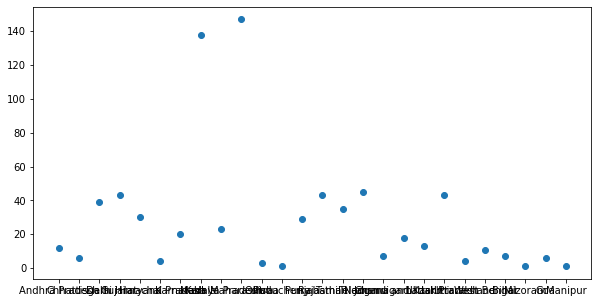

In [18]:
#scatter plot in matplotlib
plt.scatter(df["Name of State / UT"],df["total_cases"])

In [19]:
#scatter plot in plotly
px.scatter(df,"Name of State / UT","total_cases")

In [20]:
#df.iplot(kind="bar",x="Name of State / UT",y="total_cases")

In [21]:
#df.iplot(kind="scatter",x="Name of State / UT",y="total_cases")

In [22]:
#object oriented visulization
#matplotlib
#f=plt.figure()
#axes=f.add_axes([0,0,1,1])
#axes.bar(df["Name of State / UT"],df["total_cases"])
#axes.set_title("total cases in india")

#plotly
fig=go.Figure()
fig.add_trace=(go.Bar(x=df["Name of State / UT"],y=df["total_cases"]))


In [23]:
# importing indian logititude 
india_c=pd.read_excel("C:/Users/lavak/Downloads/Indian Coordinates.xlsx")

In [24]:
# merge two data_frames india_c,df on Name of State / UT
merge=pd.merge(india_c,df,on="Name of State / UT")

In [25]:
merge.head()

,Name of State / UT,Latitude,Longitude,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,total_cases,active_cases
0,Andhra Pradesh,14.750429,78.570026,12,0,1,0,12,11
1,Delhi,28.669993,77.230004,38,1,6,1,39,32
2,Haryana,28.450006,77.019991,16,14,11,0,30,19
3,Karnataka,12.570381,76.919997,20,0,3,2,20,15
4,Kerala,8.900373,76.569993,131,7,11,0,138,127


In [26]:
ma=folium.Map(location=[20,70],titles="Stamenterrain",zoom_start=7)
for lan,lon,value,name in zip(merge["Latitude"],merge["Longitude"],merge["total_cases"],merge["Name of State / UT"]):
    folium.CircleMarker([lan,lon],radius=value*0.5,popup=("<strong>State</strong>: "+str(name).capitalize()+"<br>""<strong>total_cases</strong>: "+str(value)+"<br>"),color="red",fill_color="red",fill_opacity=0.3).add_to(ma)

In [27]:
ma

## how corona virus raising globally


In [28]:
c_india=pd.read_excel("C:/Users/lavak/Downloads/per_day_cases.xlsx",sheet_name="India")

In [29]:
c_italy=pd.read_excel("C:/Users/lavak/Downloads/per_day_cases.xlsx",sheet_name="Italy")
c_whan=pd.read_excel("C:/Users/lavak/Downloads/per_day_cases.xlsx",sheet_name="Wuhan")
c_korea=pd.read_excel("C:/Users/lavak/Downloads/per_day_cases.xlsx",sheet_name="Korea")

In [30]:
c_india.columns

Index(['Date', 'Total Cases', 'New Cases', 'Days after surpassing 100 cases'], dtype='object')

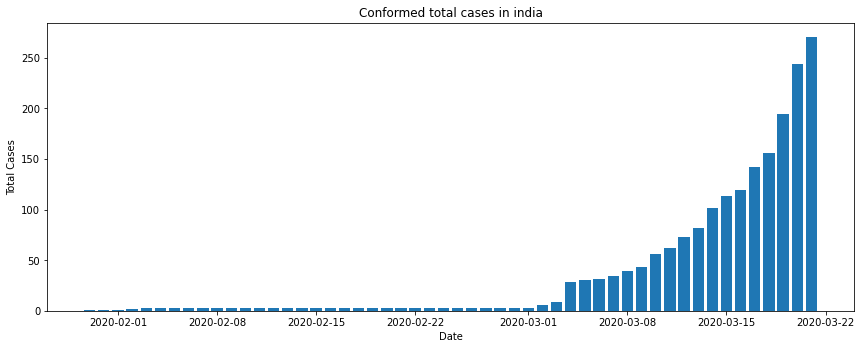

In [31]:
#matplotlib
fig=plt.figure(figsize=(14,5))
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.bar(c_india["Date"],c_india["Total Cases"])
axes.set_xlabel("Date")
axes.set_ylabel("Total Cases")
axes.set_title("Conformed total cases in india")
plt.show()
#plotly
ax=px.bar(c_india,x="Date",y="Total Cases",color="Total Cases",title="Conformed total cases in india")
ax.show()

In [32]:
ax=px.bar(c_india,x="Date",y="Total Cases",color="Total Cases")
ax.show()

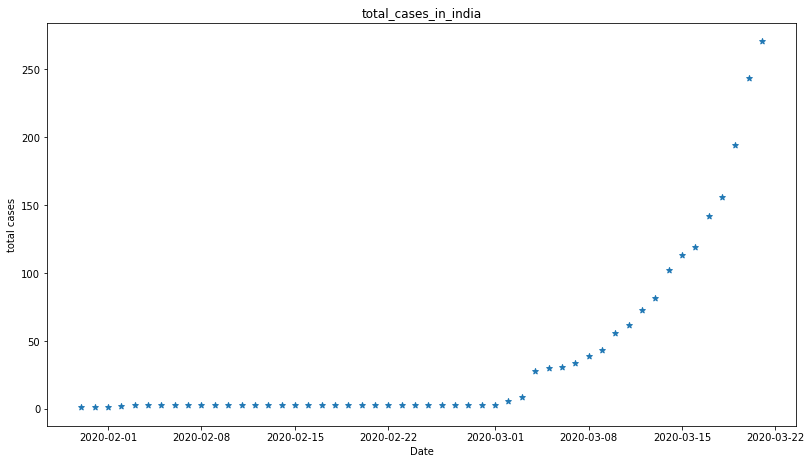

In [33]:
fig=plt.figure(figsize=(13,7))
ax=fig.add_axes([0.1,0.1,0.8,0.8])
ax.scatter(c_india["Date"],c_india["Total Cases"],marker="*")
ax.set_xlabel("Date")
ax.set_ylabel("total cases")
ax.set_title("total_cases_in_india")
plt.show()
#plotly
ax=px.scatter(c_india,x='Date',y='Total Cases',color="Total Cases")
ax.show()

In [34]:
#plotly graphs
fig=go.Figure()
fig.add_trace(go.Scatter(x=c_india["Date"],y=c_india["Total Cases"],mode="lines+markers"))

# sub_plots

In [35]:
from plotly.subplots import make_subplots

In [45]:
fig=make_subplots(rows=2,cols=2,specs=[[{"secondary_y":True},{"secondary_y":True}],[{"secondary_":True},{"secondary_y":True}]],
                 subplot_titles=("INDIA","KORIA","WUHAN","ITALY"))

ValueError: 
Invalid key specified in an element of the 'specs' argument to make_subplots: 'secondary_'
    Valid keys include: ['type', 'secondary_y', 'colspan', 'rowspan', 'l', 'r', 'b', 't']

In [60]:
fi=make_subplots(rows=2,cols=2,specs=[[{"secondary_y":True},{"secondary_y":True}],[{"secondary_y":True},{"secondary_y":True}]],
                subplot_titles=("INDIA","WUHAN","KORIA","ITALY"))
fi.add_trace(go.Bar(x=c_india["Date"],
                    y=c_india["Total Cases"],marker={"color":c_india["Total Cases"],"coloraxis":"coloraxis"}),1,1)
fi.add_trace(go.Bar(x=c_whan["Date"],
                   y=c_whan["Total Cases"],
                   marker={"color":c_whan["Total Cases"],"coloraxis":"coloraxis"}),1,2)
fi.add_trace(go.Bar(x=c_korea["Date"],
                   y=c_korea["Total Cases"],
                   marker={"color":c_korea["Total Cases"],"coloraxis":"coloraxis"}),2,1)
fi.add_trace(go.Bar(x=c_italy["Date"],
                   y=c_italy["Total Cases"],
                   marker={"color":c_italy["Total Cases"],"coloraxis":"coloraxis"}),2,2)
fi.update_layout(coloraxis={"colorscale":"Bluered_r"},showlegend=False,title="Total cases in India,wuhan,Koria,Italy",plot_bgcolor="rgb(230,230,230)")

In [63]:
w_df=pd.read_csv("https://raw.githubusercontent.com/mona2401/COVID-19-Time-Series-Forecasting-with-Data-Analysis/master/covid_19_data.csv",parse_dates=["Last Update"])

In [64]:
w_df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
5885,5886,03/15/2020,Gibraltar,UK,2020-03-14 16:33:03,1.0,0.0,1.0
5886,5887,03/15/2020,NaN,Uzbekistan,2020-03-15 18:20:19,1.0,0.0,0.0
5887,5888,03/15/2020,Diamond Princess cruise ship,Australia,2020-03-14 02:33:04,0.0,0.0,0.0
5888,5889,03/15/2020,West Virginia,US,2020-03-10 02:33:04,0.0,0.0,0.0


In [67]:
w_df.rename(columns={"ObservationDate":"Date","Country/Region":"country"},inplace=True)

In [78]:
conf_c=w_df.groupby("Date").sum()["Confirmed"].reset_index()

In [80]:
death_c=w_df.groupby("Date").sum()["Deaths"].reset_index()
recover_c=w_df.groupby("Date").sum()["Recovered"].reset_index()

In [101]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=conf_c["Date"],y=conf_c["Confirmed"],mode="lines+markers",line=dict(color="orange",width=2)))
fig.add_trace(go.Scatter(x=death_c["Date"],y=death_c["Deaths"],mode="lines+markers",line={"color":"red","width":3}))
fig.add_trace(go.Scatter(x=recover_c["Date"],y=recover_c["Recovered"],mode="lines+markers",line={"color":"green","width":2.5}))

In [105]:
df_conf=pd.read_csv("https://raw.githubusercontent.com/mona2401/COVID-19-Time-Series-Forecasting-with-Data-Analysis/master/time_series_covid_19_confirmed.csv")

In [108]:
df_conf.rename(columns={"Country/Region":"country"},inplace=True)

In [110]:
w_d=pd.merge(w_df,df_conf,on=["country","Province/State"])

In [112]:
w_d.head()

,SNo,Date,Province/State,country,Last Update,Confirmed,Deaths,Recovered,Lat,Long,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,32,01/22/2020,Washington,US,2020-01-22 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
1,70,01/23/2020,Washington,US,2020-01-23 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
2,118,01/24/2020,Washington,US,2020-01-24 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
3,159,01/25/2020,Washington,US,2020-01-25 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
4,203,01/26/2020,Washington,US,2020-01-26 16:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572


In [114]:
fig=px.density_mapbox(w_d,lat="Lat",lon="Long",hover_name="Province/State",hover_data=["Confirmed","Deaths","Recovered"],animation_frame="Date",color_continuous_scale="portland",radius=7,zoom=0,height=700)

In [119]:
fig.update_layout(title="world_wide_corona cases",mapbox_style="open-street-map",mapbox_center_lon=0,margin={"r":0,"t":0,"l":0,"b":0})